<a href="https://colab.research.google.com/github/thesamyadeep/DataCampProjects/blob/Version1/Credit_Cards_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries and DataSet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

from google.colab import files
uploaded = files.upload()

data = io.BytesIO(uploaded['crx.data'])
dataset = pd.read_csv(data, header=None)

Saving crx.data to crx.data


In [2]:
#Display dataframe using display to keep the structure intact
display(dataset)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [12]:
#Some informations regarding our dataset viz. shape, contains null values or not etc
print(dataset.shape,'\n')
print(dataset.isnull().sum(),'\n')
print(dataset.info(),'\n')
print(dataset.describe(),'\n')

(690, 16) 

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None 

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000

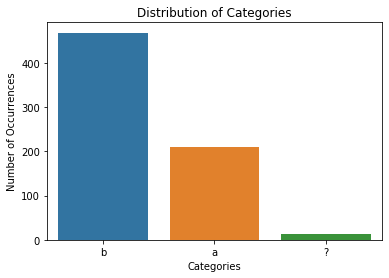

In [5]:
#Check number of categories in column 0
#Import seaborn lib for better visualisation
import seaborn as sns
number_of_categories = dataset.iloc[:,0].value_counts()
#Plotting barplot
sns.barplot(number_of_categories.index, number_of_categories.values)
plt.title('Distribution of Categories')
plt.ylabel('Number of Occurrences')
plt.xlabel('Categories')
plt.show()

Hence, we can see although there are no missing values, there are some irrelevant values in column 0

In [6]:
#Check if any NaN values are there
print(dataset.isna().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64


In [7]:
#Types of data
print(dataset.dtypes.value_counts())

object     12
float64     2
int64       2
dtype: int64


There are 12 columns with datatype as Objects

In [8]:
#Columns with datatype as object
object_columns_df = dataset.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

0         b
1     30.83
3         u
4         g
5         w
6         v
8         t
9         t
11        f
12        g
13    00202
15        +
Name: 0, dtype: object


In [13]:
#Categories of data in columns having datatype as object
cols = dataset.iloc[:,[0,1,3,4,5,6,8,9,11,12,13,15]]
for name in cols:
  print(name,':')
  print(object_columns_df[name].value_counts(),'\n')

0 :
b    468
a    210
?     12
Name: 0, dtype: int64 

1 :
?        12
22.67     9
20.42     7
25.00     6
18.83     6
         ..
24.17     1
41.42     1
41.50     1
41.92     1
39.33     1
Name: 1, Length: 350, dtype: int64 

3 :
u    519
y    163
?      6
l      2
Name: 3, dtype: int64 

4 :
g     519
p     163
?       6
gg      2
Name: 4, dtype: int64 

5 :
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
x      38
m      38
d      30
e      25
j      10
?       9
r       3
Name: 5, dtype: int64 

6 :
v     399
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: 6, dtype: int64 

8 :
t    361
f    329
Name: 8, dtype: int64 

9 :
f    395
t    295
Name: 9, dtype: int64 

11 :
f    374
t    316
Name: 11, dtype: int64 

12 :
g    625
s     57
p      8
Name: 12, dtype: int64 

13 :
00000    132
00200     35
00120     35
00160     34
00080     30
        ... 
00178      1
00163      1
00491      1
00465      1
00

So there are lots of irrelevant values in many of the columns

In [14]:
#Mean of columns (it will only work for columns having datatype as numericals)
np.mean(dataset)

2        4.758725
7        2.223406
10       2.400000
14    1017.385507
dtype: float64

In [0]:
#Replace the '?'s with NaN
dataset = dataset.replace('?',np.NaN)

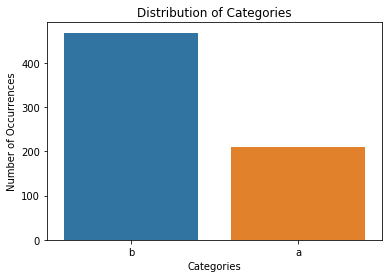

In [17]:
#Again check number of categories in column 0
number_of_categories = dataset.iloc[:,0].value_counts()
sns.barplot(number_of_categories.index, number_of_categories.values)
plt.title('Distribution of Categories')
plt.ylabel('Number of Occurrences')
plt.xlabel('Categories')
plt.show()

In [18]:
#Impute the missing values with mean imputation
dataset.fillna(dataset.mean(), inplace=True)

#Count the number of NaNs in the dataset to verify
np.mean(dataset)

2        4.758725
7        2.223406
10       2.400000
14    1017.385507
dtype: float64

In [19]:
#Check if any NaN values are there
print(dataset.isna().sum())

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64


We need to get rid of these NaN values

In [20]:
#Iterate over each column of dataset
for col in dataset.columns:
    #Check if the column is of object type
    if dataset[col].dtypes == 'object':
        #Impute with the most frequent value
        dataset = dataset.fillna(dataset[col].value_counts().index[0])

#Check again if any NaN values are there
dataset.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

We have successfully got rid of '?' >> NaN >> to some meaningful values

In [21]:
#Check datatypes of each column having independent variables
print(dataset.iloc[:,0:13].dtypes)

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
dtype: object


In [0]:
#Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

#Create an object of LabelEncoder class
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in dataset.columns:
    # Compare if the dtype is object
    if dataset[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        dataset[col]=le.fit_transform(dataset[col])

In [24]:
#Check if datatypes have been changed from object to int
print(dataset.iloc[:,0:13].dtypes)

0       int64
1       int64
2     float64
3       int64
4       int64
5       int64
6       int64
7     float64
8       int64
9       int64
10      int64
11      int64
12      int64
dtype: object


In [25]:
#Drop the columns 11 and 13 (as they are not required)
dataset = dataset.drop([11,13], axis=1)
#Segregate features and labels into separate variables and convert them into numpy arrays
X=dataset.iloc[:,0:13].values
y=dataset.iloc[:,-1].values
print(X)
print(y)

[[1.000e+00 1.560e+02 0.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 3.280e+02 4.460e+00 ... 6.000e+00 0.000e+00 5.600e+02]
 [0.000e+00 8.900e+01 5.000e-01 ... 0.000e+00 0.000e+00 8.240e+02]
 ...
 [0.000e+00 9.700e+01 1.350e+01 ... 1.000e+00 0.000e+00 1.000e+00]
 [1.000e+00 2.000e+01 2.050e-01 ... 0.000e+00 0.000e+00 7.500e+02]
 [1.000e+00 1.970e+02 3.375e+00 ... 0.000e+00 0.000e+00 0.000e+00]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [26]:
#Import train_test_split and split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[1.000e+00 2.620e+02 2.000e+00 ... 2.000e+00 0.000e+00 1.500e+01]
 [0.000e+00 5.400e+01 2.335e+00 ... 4.000e+00 2.000e+00 0.000e+00]
 [1.000e+00 1.080e+02 2.500e-01 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [0.000e+00 3.800e+01 6.650e-01 ... 0.000e+00 0.000e+00 5.000e+00]
 [0.000e+00 7.300e+01 2.290e+00 ... 7.000e+00 0.000e+00 2.384e+03]
 [1.000e+00 2.400e+02 3.290e+00 ... 0.000e+00 2.000e+00 0.000e+00]]
[[0.00e+00 2.70e+02 1.05e+01 ... 7.00e+00 0.00e+00 0.00e+00]
 [1.00e+00 3.37e+02 2.00e+01 ... 9.00e+00 0.00e+00 1.00e+03]
 [0.00e+00 1.59e+02 3.75e+00 ... 9.00e+00 0.00e+00 0.00e+00]
 ...
 [1.00e+00 6.20e+01 5.00e-01 ... 0.00e+00 0.00e+00 0.00e+00]
 [1.00e+00 7.20e+01 1.15e+01 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 2.20e+02 6.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]]
[0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0
 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0
 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0

In [27]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
print(X_train)
print(X_test)

[[ 0.6543522   1.1073505  -0.55805502 ... -0.09724543 -0.30419287
  -0.24120835]
 [-1.528229   -1.02769528 -0.49228991 ...  0.28801042  3.39622387
  -0.24493289]
 [ 0.6543522  -0.47340455 -0.90160405 ... -0.48250128 -0.30419287
  -0.24493289]
 ...
 [-1.528229   -1.19192957 -0.82013385 ... -0.48250128 -0.30419287
  -0.24369138]
 [-1.528229   -0.83266706 -0.50112403 ...  0.86589419 -0.30419287
   0.34702144]
 [ 0.6543522   0.88152835 -0.3048103  ... -0.48250128  3.39622387
  -0.24493289]]
[[-1.528229    1.18946764  1.11061173 ...  0.86589419 -0.30419287
  -0.24493289]
 [ 0.6543522   1.87719873  2.9755922  ...  1.25115004 -0.30419287
   0.0033701 ]
 [-1.528229    0.05009225 -0.21450598 ...  1.25115004 -0.30419287
  -0.24493289]
 ...
 [ 0.6543522  -0.94557813 -0.85252562 ... -0.48250128 -0.30419287
  -0.24493289]
 [ 0.6543522  -0.8429317   1.30692546 ... -0.48250128 -0.30419287
  -0.24493289]
 [-1.528229    0.67623548  0.22719992 ... -0.48250128 -0.30419287
  -0.24493289]]


In [29]:
#Fitting Classification Model to dataset
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
#Predict a new result with Logistic Regression
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0
 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0]


In [31]:
#Making the confusion matrix (confusion matrix is a func, it starts with small letter)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[66 13]
 [13 81]]


In [32]:
# Get the accuracy score of model and print it
print("Accuracy of logistic regression classifier: ", model.score(X_test,y_test))


Accuracy of logistic regression classifier:  0.8497109826589595


In [33]:
#Applying K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X= X_train, y = y_train, cv=10 , n_jobs = -1)
#n_jobs = -1 means will use all CPUs for the computations
display(accuracies)

array([0.86538462, 0.88461538, 0.94230769, 0.96153846, 0.84615385,
       0.84615385, 0.88461538, 0.8627451 , 0.80392157, 0.8627451 ])

In [34]:
#Mean of all accuracies obtained
accuracies.mean()

0.8760180995475112

In [35]:
#Variation of accuracies
accuracies.std()

0.04393511374766275

In [0]:
#Applying Grid Search to find best model and best parameters
from sklearn.model_selection import GridSearchCV
parameters = {'C' : [0.9,0.8,1.0,1.2,0.5,2.0],'max_iter' :[100,200,500,1000], 'tol' : [0.0001, 0.0002, 0.0005, 0.0003]}
gridsearch = GridSearchCV(estimator=model, param_grid= parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
gridsearch = gridsearch.fit(X_train,y_train)

In [38]:
#Find the best parameters
best_parameters = gridsearch.best_params_
print(best_parameters)

{'C': 0.9, 'max_iter': 100, 'tol': 0.0001}


In [42]:
#Finding Best Accuracy
best_accuracy = gridsearch.best_score_
print(best_accuracy)

0.8760180995475112
